# Rule Based
## Sentence Generating

In [1]:
grammar_str = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个 | 那个
noun => 女人 | 篮球 | 桌子 | 小猫 | 小可爱
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的 | 有趣的
"""

In [3]:
def parse_grammar():
    grammar_dict = {}
    for line in grammar_str.split('\n'):
        if not line: continue
        index, terms = line.split("=>")
        grammar_dict[index.strip()] = [term.split() for term in terms.split('|')]
    return grammar_dict

In [199]:
import random
def generate(grammar, target):
    if target == "null": return ""
    if target not in grammar: return target
    terms = random.choice(grammar[target])
    if terms.count == 1: return generate(grammar, terms)
    return "".join([generate(grammar, term) for term in terms])

In [200]:
print(generate(parse_grammar(),'sentence'))

这个好看的女人坐在这个蓝色的蓝色的篮球


# Search Based
## DFS

In [1]:
paths = {
    'A' : ['B'], 
    'B' : ['A','C','D','F'], 
    'C' : ['B','E'],
    'D' : ['B'],
    'E' : ['C'],
    'F' : ['B'],
}

def DFS(paths,visited=[],start='A',end = 'C'):
    visited.append(start)
    print(start)
    if start == end: 
        print(' => '.join(visited))
        return visited
    while paths[start]:
        node = paths[start].pop(0)
        if node in visited: continue
        DFS(paths,visited,node)
        
DFS(paths)

A
B
C
A => B => C
D
F


##  BFS

In [21]:
paths = {
    'A' : ['B'], 
    'B' : ['A','C','D','F'], 
    'C' : ['B','E'],
    'D' : ['B'],
    'E' : ['C'],
    'F' : ['B'],
}

def BFS(paths,start='D',end = 'A'):
    queue = []
    visited = []
    queue.append(start)
    while queue:
        node = queue.pop(0)
        print(node)
        visited.append(node)
        if node == end:
            return visited
        while paths[node]:
            next_node = paths[node].pop(0)
            if next_node in visited: continue
            queue.append(next_node)
            
print(' => '.join(BFS(paths)))

D
B
A
D => B => A


### Search Example

In [6]:
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'Chiangmai'
SG = 'Singapore'

In [22]:
air_route = {
    BJ : {SZ, GZ, WH, HLG, NY}, 
    GZ : {WH, BJ, CM, SG},
    SZ : {BJ, SG},
    WH : {BJ, GZ},
    HLG : {BJ},
    CM : {GZ},
    NY : {BJ}
}

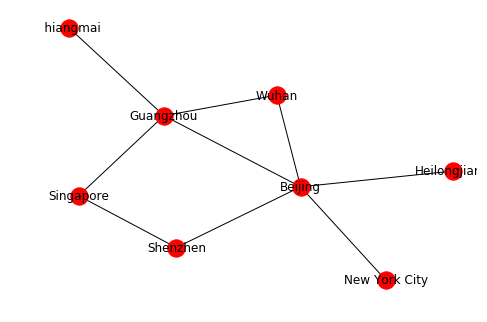

In [16]:
import networkx
%matplotlib inline # 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步

air_route = networkx.Graph(air_route)
networkx.draw(air_route, with_labels = True)

In [18]:
def search_desitination(graph, start, destination):
    paths = [[start]]
    seen = set()
    choosen_paths = []
    while paths:
        path = paths.pop(0)
        froniter = path[-1]
        if froniter in seen: continue        
        for city in graph[froniter]:
            new_path = path + [city]
            paths.append(new_path)
            if city == destination: return new_path
        
        seen.add(city)
    return choosen_paths

In [19]:
def draw_route(cities): return ' ✈️ => '.join(cities)

In [20]:
draw_route(search_desitination(air_route, SZ, WH))

'Shenzhen ✈️ => Beijing ✈️ => Wuhan'